### Question 1

* Use the approach described in Chapter 6.5.1 of Introduction to Statistical Learning to select the best subset of explanatory variables to predict richness in the RIKZ dataset
  * The apparoch in shoud use cross-validation
  * You do not need to include interaction, 

In [103]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(cli)

In [104]:
data = read.csv("RIKZ.csv")
survey_data = as.tibble(data)

In [105]:
species_cols = 2:76
counts = apply(survey_data[, species_cols] > 0, 1, sum)
survey_data["richness"] = counts

ERROR: Error: Positive column indexes in `[` must match number of columns:
* `.data` has 1 columns
* Position 1 equals 2
* Position 2 equals 3
* Position 3 equals 4
* Position 4 equals 5
* ... and 71 more problems


In [106]:
survey_data<- read.delim("RIKZ.txt")
as_tibble(survey_data)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.500,0.045,253.9,222.5,0.0500,2.05,69.8300,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.500,-1.036,226.9,200.0,0.3000,2.50,59.0000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.500,-1.336,237.1,194.5,0.1000,3.45,59.2200,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.500,0.616,248.6,221.0,0.1500,1.60,67.7500,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.500,-0.684,251.9,202.0,0.0500,2.45,57.7600,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.800,1.190,250.1,192.5,0.1000,2.50,53.0750,2
7,0,0,0,1,1,0,0,0,0,...,8,29.6,20.800,0.820,257.1,205.5,0.1000,1.85,54.4100,2
8,0,0,0,0,0,0,0,0,0,...,8,29.6,20.800,0.635,247.9,211.5,0.1000,1.70,60.4050,2
9,0,0,0,21,11,3,0,34,0,...,8,29.6,20.800,0.061,248.9,205.5,0.1500,2.30,58.8100,2
10,0,2,0,2,0,0,0,7,0,...,8,29.6,20.800,-1.334,257.9,197.0,0.0000,2.60,59.5750,2


In [107]:
species_cols = 2:76
counts = apply(survey_data[, species_cols] > 0, 1, sum)
survey_data["richness"] = counts

In [108]:
survey_data_richness = survey_data[,-species_cols]
head(survey_data_richness, n=2)

Sample,week,angle1,angle2,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,1,32,96,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.83,1,11
2,1,62,96,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.00,1,10


In [109]:
sum(is.na(survey_data_richness$richness))

[1] 0

In [110]:
library(leaps)

In [111]:
regfit.full = regsubsets(richness ~ . , survey_data_richness)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(richness ~ ., survey_data_richness)
14 Variables  (and intercept)
              Forced in Forced out
Sample            FALSE      FALSE
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Sample week angle1 angle2 exposure salinity temperature NAP
1  ( 1 ) " "    " "  " "    " "    "*"      " "      " "         " "
2  ( 1 ) " "    " "  " "    " "    "*"      " "      " "         "*"
3  ( 1 ) " "    " "  " "    " "    "*"      "*"      " "         "*"
4  ( 1 ) " "    " "  

In [112]:
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

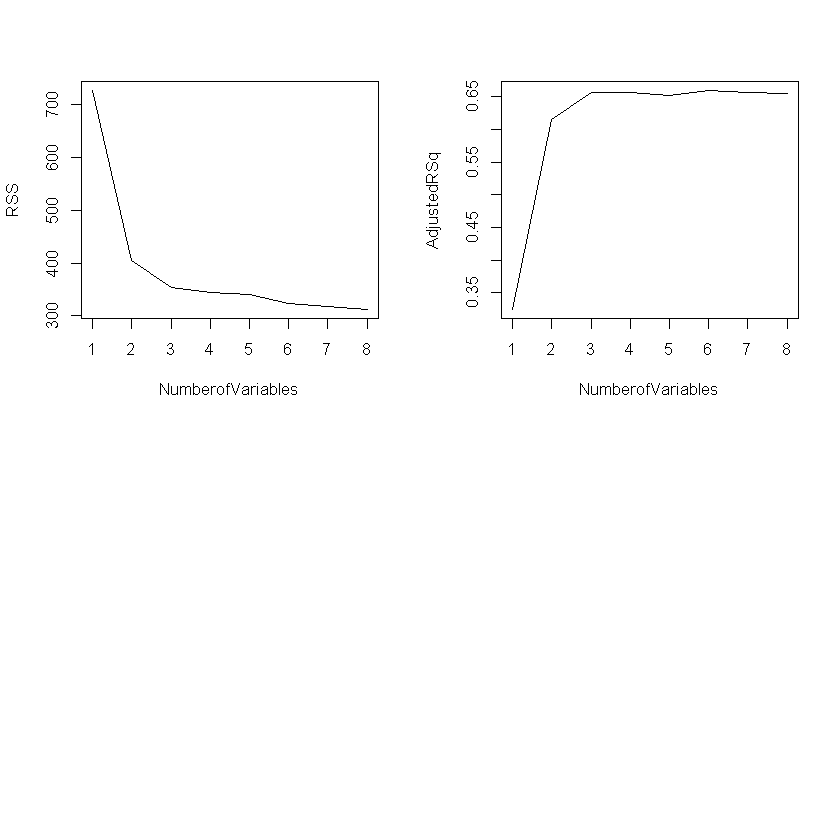

In [113]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "NumberofVariables", ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "NumberofVariables", ylab = "AdjustedRSq", type = "l")

In [114]:
which.max(reg.summary$adjr2)

[1] 6

In [115]:
points(6, reg.summary$adjr2[6], col = "red", cex = 2, pch = 20)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


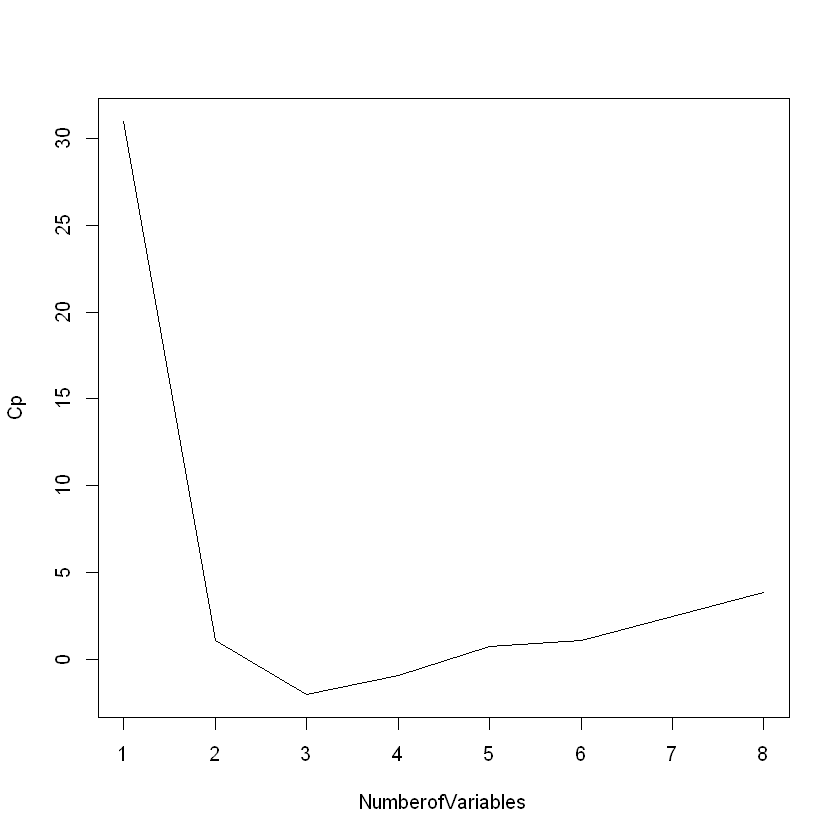

In [116]:
plot(reg.summary$cp, xlab = "NumberofVariables", ylab = "Cp", type = "l")

In [117]:
which.min(reg.summary$cp)

[1] 3

In [118]:
points(3, reg.summary$cp[3], col = "red", cex = 2,pch = 20)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [119]:
which.min(reg.summary$bic)

[1] 3

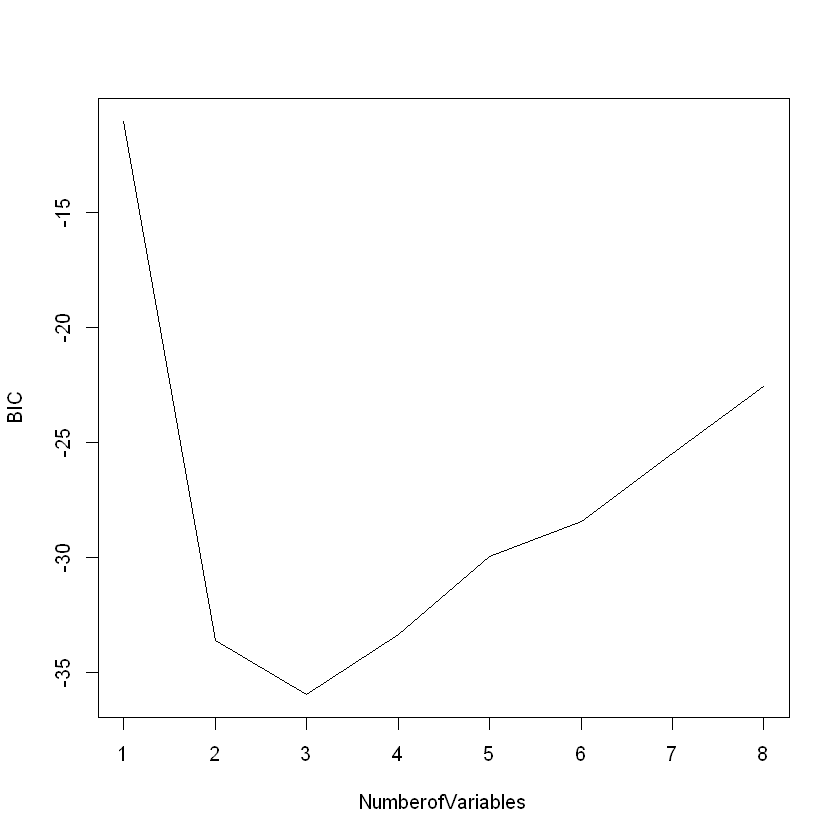

In [120]:
plot(reg.summary$bic, xlab = "NumberofVariables", ylab = "BIC", type = "l")

In [121]:
points(3, reg.summary$bic[3], col = "red", cex = 2, pch = 20)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


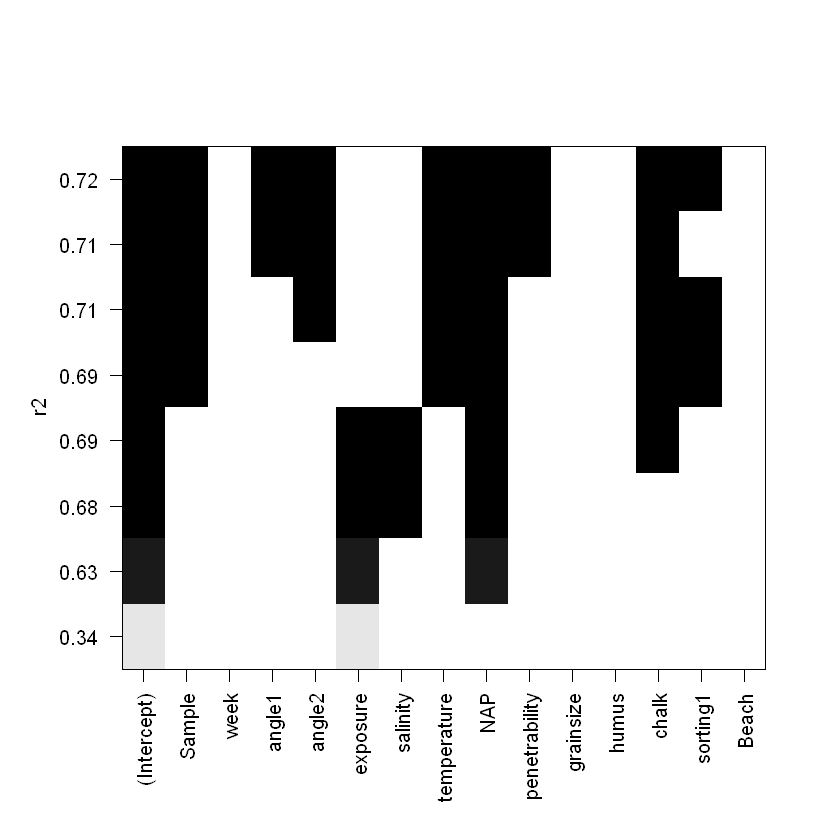

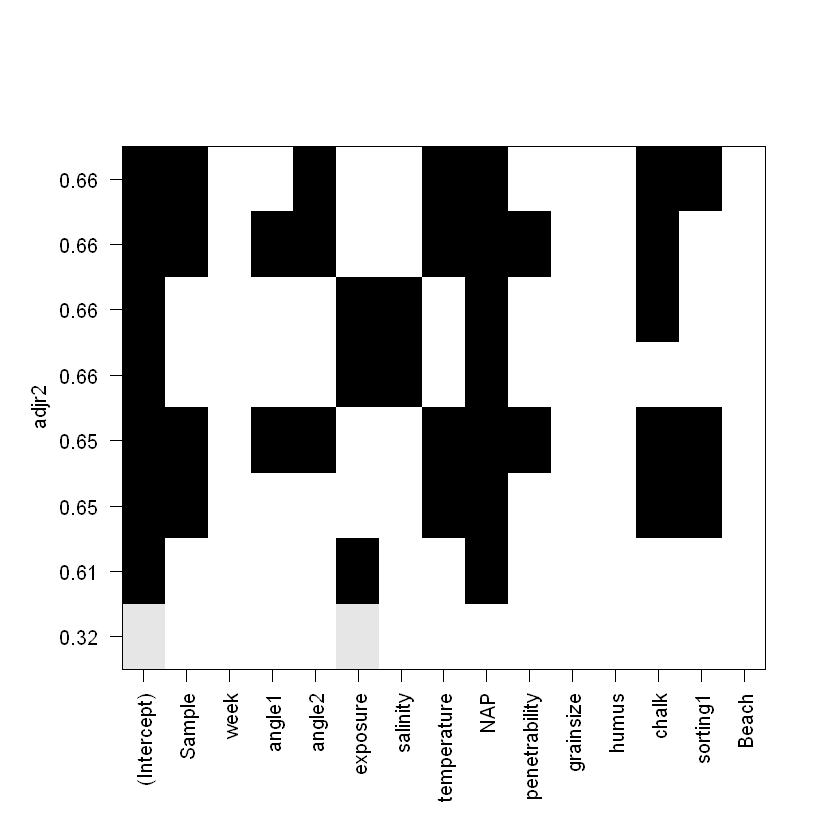

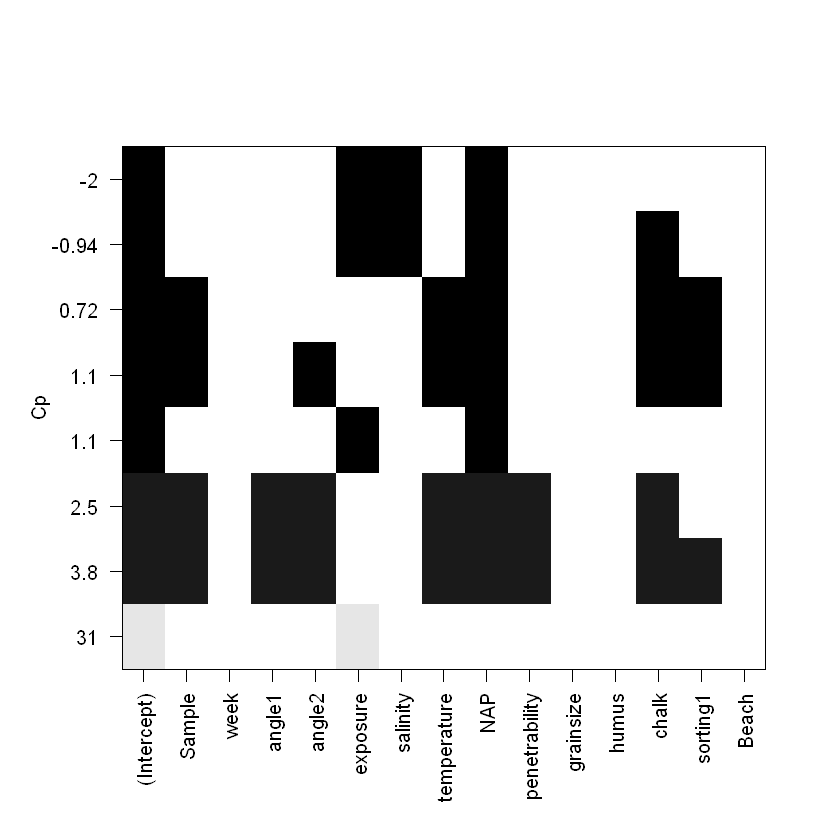

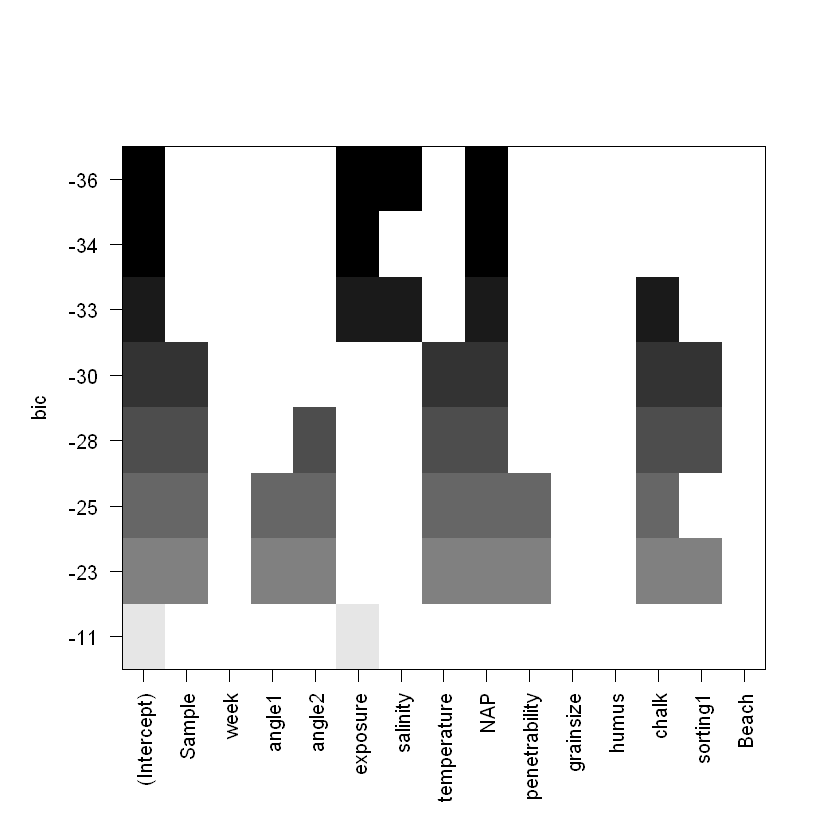

In [122]:
plot(regfit.full, scale = "r2")
plot(regfit.full, scale = "adjr2") 
plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

In [123]:
coef(regfit.full, 6)

(Intercept)       Sample       angle2  temperature          NAP        chalk 
-22.65498021  -0.18269524   0.02492311   1.60561940  -2.87778830  -0.22639267 
    sorting1 
  0.03847042

In [124]:
regfit.fwd = regsubsets(richness ∼ ., data = survey_data_richness, nvmax = 19, method = "forward") 
summary(regfit.fwd) 
regfit.bwd = regsubsets(richness ∼ ., data = survey_data_richness, nvmax = 19, method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness, 
    nvmax = 19, method = "forward")
14 Variables  (and intercept)
              Forced in Forced out
Sample            FALSE      FALSE
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: forward
          Sample week angle1 angle2 exposure salinity temperature NAP
1  ( 1 )  " "    " "  " "    " "    "*"      " "      " "         " "
2  ( 1 )  " "    " "  " "    " "    "*"      " "      " "         "*"
3  ( 1 )  " "    " "  " "    " "    "*"      

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness, 
    nvmax = 19, method = "backward")
14 Variables  (and intercept)
              Forced in Forced out
Sample            FALSE      FALSE
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: backward
          Sample week angle1 angle2 exposure salinity temperature NAP
1  ( 1 )  " "    " "  " "    " "    " "      " "      " "         "*"
2  ( 1 )  " "    " "  " "    " "    " "      " "      "*"         "*"
3  ( 1 )  "*"    " "  " "    " "    " "    

In [125]:
coef(regfit.full, 7)

(Intercept)        Sample        angle1        angle2   temperature 
-18.111888361  -0.108049843  -0.011925401   0.030978565   1.588481109 
          NAP penetrability         chalk 
 -2.999966287  -0.008979684  -0.136366240

In [126]:
coef(regfit.fwd, 7)

(Intercept)      angle1      angle2    exposure    salinity         NAP 
-5.45505594 -0.00584490  0.02093190 -2.12571831  1.12201216 -2.62050959 
      chalk    sorting1 
-0.10344048  0.02212436

In [127]:
coef(regfit.bwd, 7)

(Intercept)        Sample          week        angle2   temperature 
-18.726457247  -0.165726269   1.076998011   0.042576358   1.448068569 
          NAP penetrability         chalk 
 -2.893777504  -0.007174237  -0.106869775

In [128]:
train = sample(c(TRUE, FALSE), nrow(survey_data_richness), replace = TRUE)
test = (!train)

In [129]:
regfit.best = regsubsets(richness ∼ ., data = survey_data_richness[train, ], nvmax = 19)

In [130]:
test.mat = model.matrix(richness ∼ ., data = survey_data_richness[test, ])

In [131]:
coefi = coef(regfit.best, id = i)
pred = test.mat[,names(coefi)] %*% coefi
val.errors = rep(NA, 14)
    for (i in 1:14) { 
        coefi = coef(regfit.best, id = i) 
        pred = test.mat[,names(coefi)] %*% coefi
        val.errors[i] = mean((survey_data_richness$richness[test] -pred)^2)
        }

In [132]:
val.errors

[1] 16.685993 14.459408  9.034342 11.057421 13.521599 14.946971 17.672762
 [8] 17.101030 19.147826 17.545828 18.643814 19.508842 19.384272 19.382191

In [133]:
which.min(val.errors)

[1] 3

In [134]:
coef(regfit.best, 2)

(Intercept)    salinity         NAP 
 -50.271503    2.009788   -3.370708

In [144]:
predict.regsubsets = function(object, newdata, id, ...) { 
    form = as.formula(object$call[[2]]) 
    mat = model.matrix(form, newdata) 
    coefi = coef(object, id = id) 
    xvars = names(coefi) 
    mat[ ,xvars]%*%coefi
    }

In [145]:
regfit.best = regsubsets(richness ∼ ., data = survey_data_richness, nvmax = 19) 
coef(regfit.best, 2)

(Intercept)    exposure         NAP 
  37.290896   -2.998809   -2.725181

In [146]:
k = 10 
n = nrow(survey_data_richness) 
folds = sample(rep(1:k, length = n)) 
cv.errors<-matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

In [149]:
for (j in 1:k) {
    best.fit = regsubsets(richness ∼ ., 
        data = survey_data_richness[folds != j, ], 
        nvmax = 14)
    for (i in 1:14) {
       pred = predict(best.fit, survey_data_richness[folds == j, ], id = i)
        cv.errors[j, i] = 
            mean((survey_data_richness$richness[folds == j] -pred)^2)
        }
    }

In [150]:
mean.cv.errors = apply(cv.errors, 2, mean) 
mean.cv.errors

1        2        3        4        5        6        7        8 
26.23817 10.77289 10.78426 13.28295 14.11347 14.04941 14.28025 13.79073 
       9       10       11       12       13       14       15       16 
14.55680 14.77266 15.37062 15.93227 16.02008 15.99147       NA       NA 
      17       18       19 
      NA       NA       NA

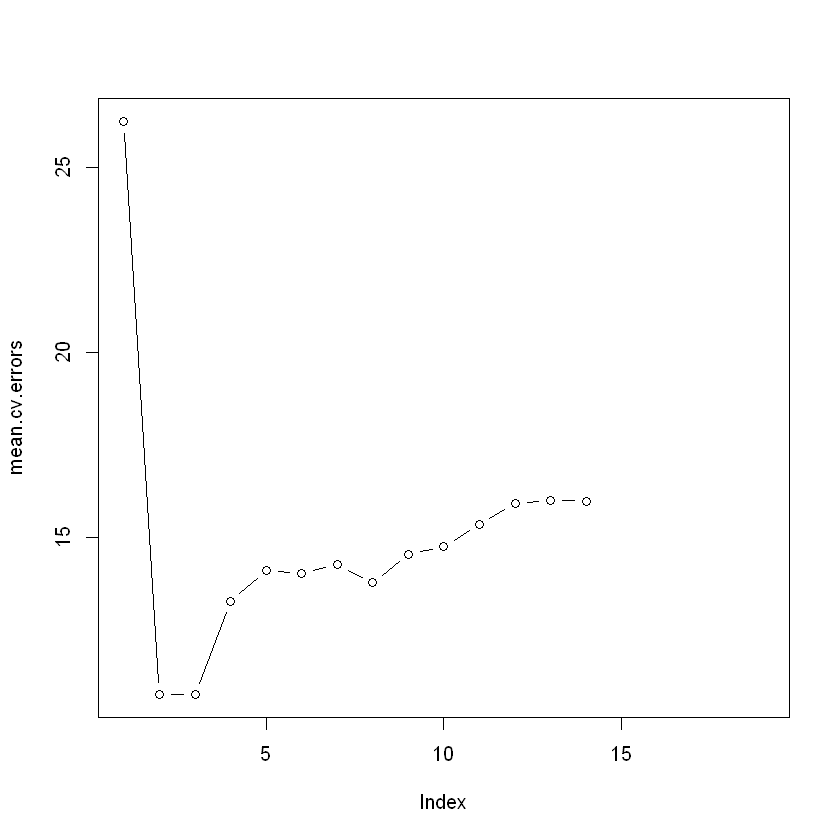

In [151]:
par(mfrow = c(1, 1))
plot(mean.cv.errors,type = "b")

In [152]:
reg.best = regsubsets(richness∼.,data = survey_data_richness,
    nvmax=19)
coef(reg.best,10)

(Intercept)        Sample          week        angle1        angle2 
-22.409259405  -0.180134820   1.360278002  -0.009541005   0.074296782 
     exposure   temperature           NAP penetrability     grainsize 
 -0.322800268   1.521259895  -2.745844472  -0.008751018   0.016101350 
        chalk 
 -0.113891398